<a href="https://colab.research.google.com/github/TobAde/tobiadeniji.github.io/blob/master/Statistical_Tests_and_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing Udacity A/B test!

<div><img style="height: 350px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Udacity_logo.png" /></div>

## Background

At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. 

Data is available at https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0

---------

# Project

##Introduction

The data set consists of control and experiment dataset for 36 days recording a change on the Udacity A/B testing Course platform.

With the primary KPI of getting more payments from advising people on how much time is required to take the course so multiple enrollments are not gotten without the final payments taking place for the course.

The KPI can be measured with the retention metric which is defined as the rate of payments per enrollment.

##Loading Packages and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from scipy.stats import ttest_ind

In [ ]:
control = pd.read_csv('control.csv')
exp = pd.read_csv('experiment.csv')

## Merging datasets

In [ ]:
control.columns = ['Date', 'control_pageviews', 'control_clicks', 'control_enrollments', 'control_payments']
exp.columns = ['Date', 'exp_pageviews', 'exp_clicks', 'exp_enrollments', 'exp_payments']
df = pd.merge(control, exp, on = 'Date')

## Click Through Rate Metric

The click through rate metric will be used for the Sanity check to make sure the proportion of clicks given a pageview (this will be a measure of the click through probability)is about the same in both groups (control and experiment).
In order to check this out we will use A/B test.

The **null hypothesis** chosen is that there is no difference between the click-through probability of the control and experiment groups

In [ ]:
control_ctr = df['control_clicks'].sum() / df['control_pageviews'].sum()
exp_ctr = df['exp_clicks'].sum() / df['exp_pageviews'].sum()
d_hat = round(exp_ctr - control_ctr, 6)
total_clicks = df['control_clicks'].sum() + df['exp_clicks'].sum()
total_pageviews = df['control_pageviews'].sum() + df['exp_pageviews'].sum()
prob_pooled = total_clicks / total_pageviews

In [ ]:
alpha = 1 - 0.95
z_score = st.norm.ppf(1 - alpha / 2)
se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (1 / df['control_pageviews'].sum() + 1 / df['exp_pageviews'].sum()))
margin_of_error = se_pooled * z_score
print ("The confidence interval is between",0-margin_of_error,"and",0+margin_of_error)

The confidence interval is between -0.001295655390242568 and 0.001295655390242568


In [ ]:
if d_hat < -margin_of_error or d_hat > margin_of_error:
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")

Do not reject the null hypothesis


The click through probability which is a proportion in a population of the two samples is about the same since our d_hat is within the confidence interval. 

The confidence interval shows the range to prove there's no significant difference in click through probability of the two poportions.


###Visualising the Confidence Interval

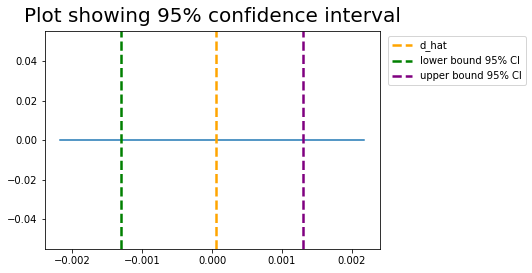

In [ ]:
x = [(-st.norm.ppf(1 - .001 / 2) * se_pooled), (st.norm.ppf(1 - .001 / 2)*se_pooled)]
y = [0,0]
sns.lineplot(x=x,y=y)
plt.title("Plot showing 95% confidence interval", y=1.015, fontsize=20)
plt.axvline(x=d_hat, linestyle='--', linewidth=2.5, label="d_hat", c='orange')
plt.axvline(x=-margin_of_error, linestyle='--', linewidth=2.5, label="lower bound 95% CI", c='g')
plt.axvline(x=margin_of_error, linestyle='--', linewidth=2.5, label="upper bound 95% CI", c='purple')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

### Z-test

The **null hypothesis** is that there is no difference between the means of the click through rate per day for the control and experiment data.

The **alternate hypothesis** is that the daily click through rate is different.

In [ ]:
df['control_ctr'] = df['control_clicks'] / df['control_pageviews']
df['exp_ctr'] = df['exp_clicks'] / df['exp_pageviews']

This will create columns for the click through rate per day for both the control and experiment data.

####Defining a function for Z-test

##### Function

In [ ]:
def get_z_test (confidence_level,diff,x1,x2,sd1,sd2,n1,n2) :
 
  print("For confidence level of", confidence_level,"%")
  
  alpha = round(1 - confidence_level/100, 5)

  print("Alpha is", alpha)

  z_score = st.norm.ppf(1 - alpha / 2)

  z_test_score = ((x1 - x2)-diff)/(math.sqrt((sd1**2/n1) + (sd2**2/n2)))
  

  p_value = round(st.norm.sf(abs(z_test_score))*2, 5)
  print("P-value is", p_value)


  if z_test_score < -z_score or z_test_score > z_score:
    print("Accept Alternate hypothesis")

  else:
    print("Fail To Reject Null Hypothesis")

 


##### Parameters

x1 = Mean of Sample 1

x2 = Mean of Sample 2

sd1 = Standard deviation 1

sd2 = Standard deviation 2

n1 = size of sample 1

n2 = size of sample 2

diff = hypothesized difference

In [ ]:
x1 = df['control_ctr'].mean()
x2 = df['exp_ctr'].mean()

sd1 = df['control_ctr'].std()
sd2 = df['exp_ctr'].std()

n1 = df['control_ctr'].count()
n2 = df['exp_ctr'].count()

diff = 0

where diff is the hypothesized difference testing for equal means

####Z-test for Confidence level of 95%

In [ ]:
get_z_test(confidence_level,diff,x1,x2,sd1,sd2,n1,n2)

For confidence level of 95 %
Alpha is 0.05
P-value is 0.93383
Accept Null Hypothesis


The function uses the z_test_score to check the statistical significance of the metric which is then seconded by the p-value 

Since the p-value less than the alpha value, we have to Accept the null Hypothesis.

###T-test

The **null hypothesis** is that there is no difference between the means of the click through rate per day for the control and experiment data.
The **alternate hypothesis** is that the daily click through rate is different.

Using confidence level of 95%

####Defining a function for T-test

##### Function

In [ ]:
def get_t_test (confidence_level,a,b):
  print("For confidence level of", confidence_level,"%")
  
  alpha = round(1 - confidence_level/100, 5)
  print("Alpha is", alpha)

  stat, p_value = ttest_ind(a,b)
  print("P-value is", round(p_value,5))

  if p_value < alpha:
    print("Reject Null Hypothesis")
  else:
    print("Accept Null Hypothesis")
 
  print("")

##### Parameters

a = sample 1(Control data click through rate)

b = sample 2(Experiment data click through rate)

In [ ]:
a = df['control_ctr']
b = df['exp_ctr']
confidence_level = 95

####T-test for Confidence level of 95%

In [ ]:
get_t_test(95,a,b)

For confidence level of 95 %
Alpha is 0.05
P-value is 0.93406
Accept Null Hypothesis



With Alpha value of 0.05, which is less that the pvalue of 0.93406, from the t-test, We have to fail to reject the null hypothesis.

### Comparison of the two methods

Both the Z-test and T-test have p-values higher than the alpha value of 0.05. Implying that they both accept the Null hypothesis stated.

There is a slight difference in their values. As they are both comparing the means of the click through probability of the two samples.

Z-test had a p_value of 0.93383
while 
T-test had a p_value of 0.93406


## Retention Metric for Evaluation 

The retention metric is defined as the probability of payment, given enrollment

We will use t_test to check if there is a statistical difference between the control and expreiment retention rate for varying Confidence Intervals

The **Null Hypothesis** is that there is no difference between the means of the retention rate per day for the control and experiment data.

In [ ]:
df1= df.dropna(0)[['Date','control_payments', 'control_enrollments','exp_payments','exp_enrollments']]
df1['control_rtn'] = df1['control_payments'] / df1['control_enrollments']
df1['exp_rtn'] = df1['exp_payments'] / df1['exp_enrollments']

Of the 36 rows provided in the data set, only 22 days have both payments and enrollments recorded and this will disrupt the comparison of the means.

### Other Confidence levels 

a = sample 1(control data retention rate per day)

b = sample 2(Experiment data retention rate per day)

In [ ]:
a = df1['control_rtn']
b = df1['exp_rtn']
confidence_levels = [60,90,95,99]

In [ ]:
for confidence_level in confidence_levels:
  get_t_test(confidence_level,a,b)

For confidence level of 60 %
Alpha is 0.4
P-value is 0.3189
Reject Null Hypothesis

For confidence level of 90 %
Alpha is 0.1
P-value is 0.3189
Accept Null Hypothesis

For confidence level of 95 %
Alpha is 0.05
P-value is 0.3189
Accept Null Hypothesis

For confidence level of 99 %
Alpha is 0.01
P-value is 0.3189
Accept Null Hypothesis



This shows that there is a difference between the average retention rate for a confidence level of 60% while for other percentages there seem to be no difference and the null hypothesis is accepted

## Conclusion

The experiment failed as the null Hypothesis is accepted with a confidence level of 90% and greater.
I will suggest another experiment is carried out and this experiment is not launched for the KPI to be improved which is the Retention rate for the A/B testing course on Udacity which is the reason for the change.
